In [84]:
import networkx as nx
import matplotlib.pyplot as plt

# File structuring functions

In [85]:
def is_valid(line): #Takes a list
    try:
        if(type(int(line[1].replace(" ",""))) == int):
            return line
    except:
        line.pop(1)
        return is_valid(line)

In [86]:
def delete_spaces(line): #Takes a string
    count = 0
    while(line[count] == " "):
        count += 1
    return line[count:len(line)]

In [87]:
def get_edges(line): #Takes a list
    EDGES = []
    for count,node in enumerate(line):
        try:
            if(type(int(node)) == int):
                EDGES.append(count+1)
        except:
            line[count] = "None"
    return EDGES

In [88]:
def get_weights(line): #Takes a list
    line = " ".join(line)
    line = line.replace("None","")
    line = line.split()
    for y,x in enumerate(line):
        line[y] = int(x)
        
    return line

# Opening and structuring the 2.4 Ghz text file

In [89]:
NODES = []
with open("2.4ghz_net.txt","r",encoding='utf-8-sig') as File:
    data = File.readline()
    while data:
        node = data.strip().split("      ")
        node = node[0:len(node)]
        node = is_valid(node)
        node[1] = delete_spaces(node[1]).replace("   "," {}".format(None))
        node[1] = node[1].split(" ")
        
        NODES.append({'Node_ID':int(node[1].pop(0)),'Name':node[0],
                      'edges':get_edges(node[1]),'weights':get_weights(node[1]),
                      'pos':(float(node[2].replace(" ","")),float(node[3].replace(" ","")))})
    
        data = File.readline()
    File.close()

In [90]:
def links(NODES):
    Links = []
    for node in NODES:
        for edge in range(len(node['edges'])):
            Links.append([node['Node_ID'],node['edges'][edge],node['weights'][edge],node['pos']])
    return Links

# A function that returns the lowest link within the network

In [91]:
def lowest_link(Links):
    lowest = Links[0]
    for x in Links:
        if(x[2] < lowest[2]):
            lowest = x
    return lowest

# The create graph method creates a graph and the k_connected method checks to see if there a path from the source node to the destination node in the reduction algorithm

In [92]:
def create_graph(Links):
    Graph = nx.Graph()
    for node in Links:
        Graph.add_node(node[0],pos=node[3])
    for node in Links:
        Graph.add_edge(node[0],node[1],weight=node[2])
    return Graph

def is_k_connected(lowest):
    try:
        if(nx.has_path(Graph,lowest[0],lowest[1])):
            return True
        else:
            return False
    except:
        return False

# The graph below is the Dense network topology

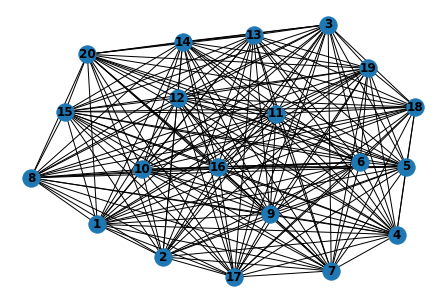

In [93]:
Links = links(NODES)
Graph = create_graph(Links)
nx.draw(Graph, with_labels=True, font_weight='bold')

# Link topology reduction algorithm and the Sparse Topology 

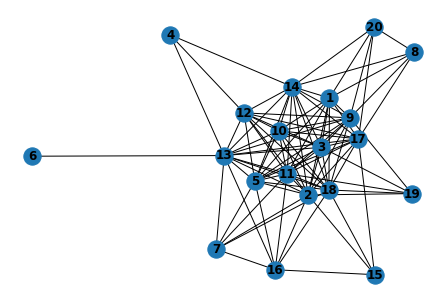

In [94]:
Links = links(NODES)
Graph = create_graph(Links)
def reduce(NON_VISITED):
    for x in NON_VISITED:
        lowest = lowest_link(NON_VISITED)
        Artificial_del = NON_VISITED.pop(NON_VISITED.index(lowest))
        try:
            Graph.remove_edge(Artificial_del[0],Artificial_del[1])
            k_paths = is_k_connected(lowest)
            if(k_paths == False):
                Graph.add_edge(Artificial_del[0],Artificial_del[1],weight=Artificial_del[2])
        except:pass
reduce(Links)
nx.draw(Graph, with_labels=True, font_weight='bold')


# Functions that aid in developing the minimum spanning tree topologies

In [95]:
from networkx.algorithms import tree

In [96]:
def get_kruskal_tree(GRAPH):
    kruskal_tree = tree.minimum_spanning_tree(GRAPH, algorithm='kruskal')
    return kruskal_tree

In [97]:
def get_prim_tree(GRAPH):
    prim_tree = tree.minimum_spanning_tree(GRAPH, algorithm='prim')
    return prim_tree

In [98]:
def get_boruvka_tree(GRAPH):
    boruvka_tree = tree.minimum_spanning_tree(GRAPH, algorithm='boruvka')
    return boruvka_tree

# The three minimum spanning tree topologies

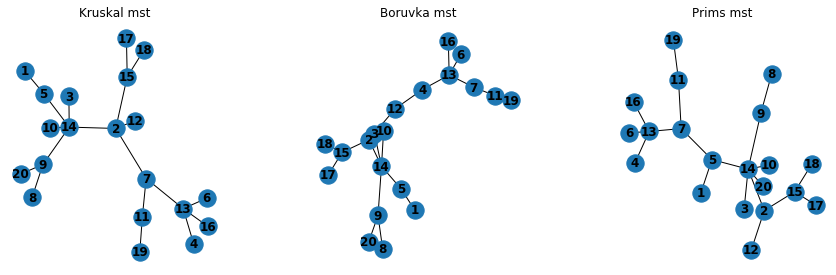

In [99]:
fig,a =  plt.subplots(1,3)
fig.tight_layout()
fig.set_figwidth(13)
a[0].set_title("Kruskal mst")
a[1].set_title("Boruvka mst")
a[2].set_title("Prims mst")
nx.draw(get_kruskal_tree(Graph.to_undirected()), with_labels=True, font_weight='bold',ax=a[0])
nx.draw(get_boruvka_tree(Graph.to_undirected()), with_labels=True, font_weight='bold',ax=a[1])
nx.draw(get_prim_tree(Graph.to_undirected()), with_labels=True, font_weight='bold',ax=a[2])

# The backbone topology algorithm on the Sparse topology

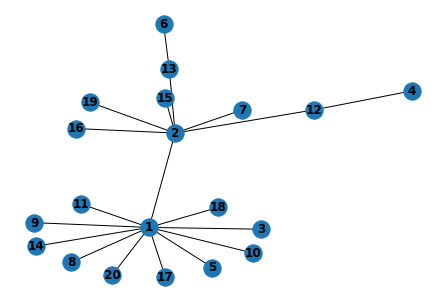

In [100]:
Nodes = {}
Tree_Edges = []
for node in Graph.nodes:
    Nodes[node]='white'
    
count = 1
Nodes[count] = 'grey'
while(count <= len(Nodes)):
    if(Nodes[count] =='grey'):
           Nodes[count] = 'black'
    Neighbors = [x for x in Graph.neighbors(count)]
    for y in Neighbors:
        if(Nodes[y] == 'white'):
            Nodes[y] = 'grey'
            Tree_Edges.append((count,y))
        
    count+=1
    
Tree = nx.Graph(Tree_Edges)
nx.draw(Tree, with_labels=True, font_weight='bold')

# Clustering the Sparse Network topology by color

In [106]:
from sklearn.cluster import SpectralClustering
import numpy as np

COLORS = [x for x in range(len(Graph.nodes))]
CLU = nx.to_numpy_matrix(Graph)
sc = SpectralClustering(3, affinity='precomputed', n_init=1)
sc.fit(CLU)
clusters = sc.labels_

In [127]:
import random

C = ['red','blue','darkgreen','yellow','purple','orange','brown','white','cyan','maroon','navy','grey','pink','lime']
COLORS = [x for x in range(0,len(Graph.nodes))]
VISITED = []
for x in clusters:
    if(x in VISITED):
        continue
    VISITED.append(x)
    Colour = C.pop(random.randint(0,len(C)-1))
    for ind,y in enumerate(clusters):
        if(x == y):
            COLORS[ind] = Colour

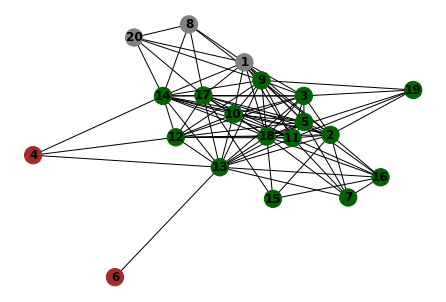

In [128]:
nx.draw(Graph,with_labels=True, font_weight='bold',node_color=COLORS)